In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import stats
import shap
import sklearn
import sklearn.neural_network

In [2]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [23]:
# to use shap, build our model like we normally would

# sv = iris[(iris['class'] == 'Iris-setosa') | (iris['class'] == 'Iris-virginica')]
sv = iris[(iris['class'] == 'Iris-versicolor') | (iris['class'] == 'Iris-virginica')]

xs = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
ys = sv['class']

# ys[ ys == 'Iris-setosa' ] = 0 # don't do this anymore :(
ys = ys.replace(['Iris-versicolor', 'Iris-virginica'], [0,1]).values

# probably a better idea to split the data etc.
clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,100),max_iter=10000)
clf.fit(xs,ys)


explainer = shap.Explainer(clf.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values = explainer(xs)

In [19]:
# shap_values[i] will give you the data for the ith data point shap values
shap_values[0]

.values =
array([-0.08666667, -0.05      , -0.18333333, -0.19      ])

.base_values =
0.51

.data =
array([7. , 3.2, 4.7, 1.4])

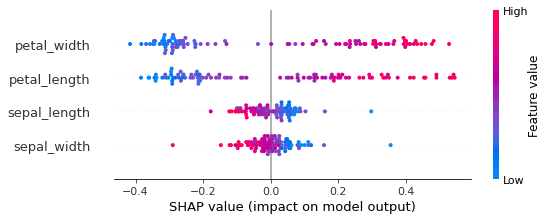

In [24]:
shap.summary_plot(shap_values)

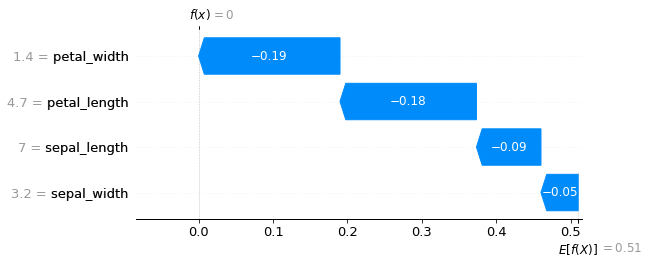

In [21]:
shap.plots.waterfall(shap_values[0])

In [12]:
help(shap.plots.force)

Help on function force in module shap.plots._force:

force(base_value, shap_values=None, features=None, feature_names=None, out_names=None, link='identity', plot_cmap='RdBu', matplotlib=False, show=True, figsize=(20, 3), ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, contribution_threshold=0.05)
    Visualize the given SHAP values with an additive force layout.
    
    Parameters
    ----------
    base_value : float
        This is the reference value that the feature contributions start from. For SHAP values it should
        be the value of explainer.expected_value.
    
    shap_values : numpy.array
        Matrix of SHAP values (# features) or (# samples x # features). If this is a 1D array then a single
        force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.
    
    features : numpy.array
        Matrix of feature values (# features) or (# samples x # features). This provides the values of all the
        features, an

In [25]:
shap.initjs()
shap.plots.force(shap_values)
# shap.plots.force(shap_values[0].base_values, shap_values[0].values, shap_values[0].data)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

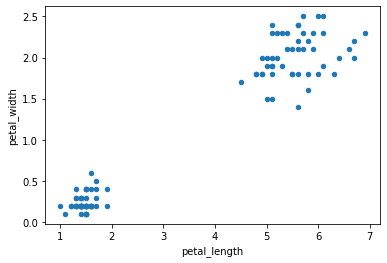

In [48]:
# sv.plot.scatter(x='petal_length', y='petal_width')

<AxesSubplot:>

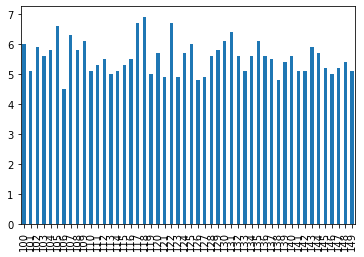

In [52]:
# now maybe visualize bars of petal length colored by class, they should have stark differences
# even more, maybe we do a hyp test of a difference in mean

sv[ys==0]['petal_length'].plot.bar()
sv[ys==1]['petal_length'].plot.bar()

In [1]:
shap_values

NameError: name 'shap_values' is not defined